# TP1 

This report provides an in-depth analysis of a series of Python code segments designed for image processing and analysis. The code focuses on various aspects of image manipulation, including filtering, contour extraction, and Fourier transform-based denoising. 

In [1]:
from matplotlib import pyplot as plt
import tifffile as tiff
import numpy as np
import cv2 as cv

In [2]:
#path_pref = "C:/Users/ysahu/Downloads"
path_pref = "C:/Users/mikho/Desktop/Vision par ordinateur/"

img_name_fruit = path_pref + "ImagesDeTravail/ImagesAphelion/FRUIT.TIF"
img_name_test = path_pref + "ImagesDeTravail/test.TIF"
img_name_test1 = path_pref + "ImagesDeTravail/test1.TIF"
img_name_test2 = path_pref + "ImagesDeTravail/test2.TIF"
img_name_test3 = path_pref + "ImagesDeTravail/test3.TIF"
img_name_aquitain = path_pref + "ImagesDeTravail/aquitain.TIF"
img_name_galaxy = path_pref + "ImagesDeTravail/galexy.TIF"
img_name_mercury = path_pref + "ImagesDeTravail/mercury.TIF"
img_name_noise = path_pref + "ImagesDeTravail/noise.TIF"
img_name_clown = path_pref + "ImagesDeTravail/clown.TIF"

# 1 Commandes de base 

- Converting image from BGR colorspace to gray colorspace
- Converting image from BGR colorspace to RGB colorspace

Text(0.5, 1.0, 'COLOR_BGR2RGB')

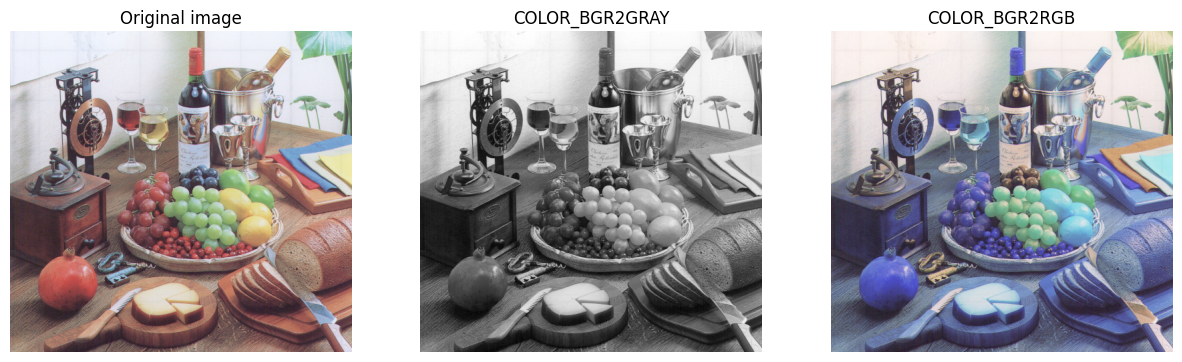

In [4]:
img_fruit = tiff.imread(img_name_fruit)

f, axarr = plt.subplots(1,3,figsize=(15,5))

axarr[0].imshow(img_fruit)
axarr[1].imshow(cv.cvtColor(img_fruit, cv.COLOR_BGR2GRAY), cmap="gray")
axarr[2].imshow(cv.cvtColor(img_fruit, cv.COLOR_BGR2RGB))

axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')

axarr[0].set_title("Original image")
axarr[1].set_title("COLOR_BGR2GRAY")
axarr[2].set_title("COLOR_BGR2RGB")


# 2 Analyse visuelle : premières approches

##  2.1 Histogramme

- An histogram represents the distribution of pixel values (grayscale or color) in an image.
- By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image.

Following histogram reveals a distribution with prominent peak around pixel values 230-255, which indicates that a significant portion of the pixels falls within this range

(0.0, 256.0, 0.0, 10000.0)

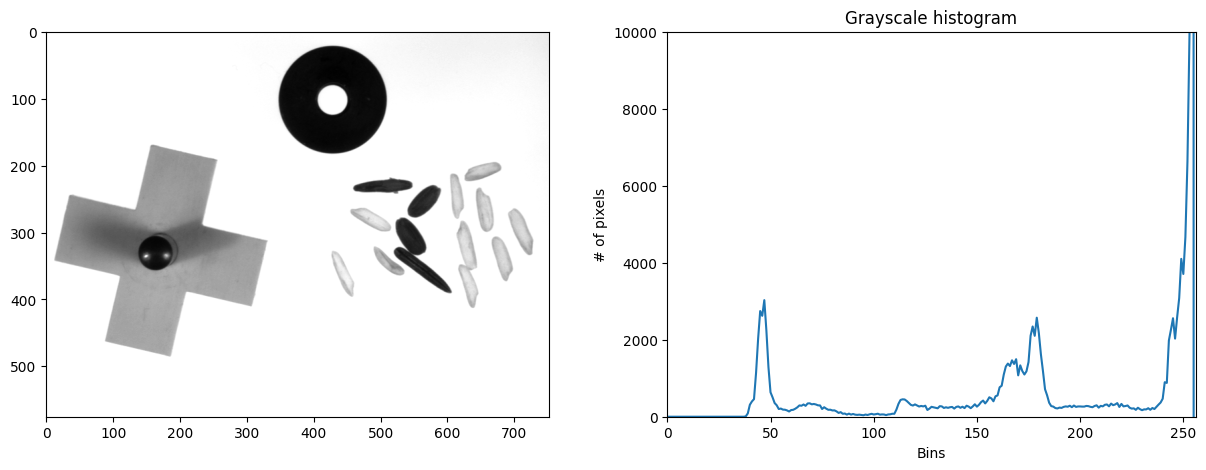

In [17]:
img_test = tiff.imread(img_name_test)
chans = cv.split(img_test)

f, axarr = plt.subplots(1,2,figsize=(15,5))

axarr[0].imshow(img_test, cmap="gray")

axarr[1].set_title('Grayscale histogram')
axarr[1].set_xlabel('Bins')
axarr[1].set_ylabel('# of pixels')

hist = cv.calcHist([img_test], [0], None, [256], [0, 255])
axarr[1].plot(hist)
axarr[1].axis(xmin=0,xmax=256, ymin=0,ymax=10000)


Following histograms represents the distribution of pixel values in the red (r), green (g), and blue (b) color channels of an image.


- the position of peaks in red pixel values represent the presence of darker red tones
- the position of peaks in green pixel values represent the presence of darker green tones
- the position of peaks in blue pixel values  suggests the presence of two dominant sets of blue tones in the image: darker blues and brighter blues

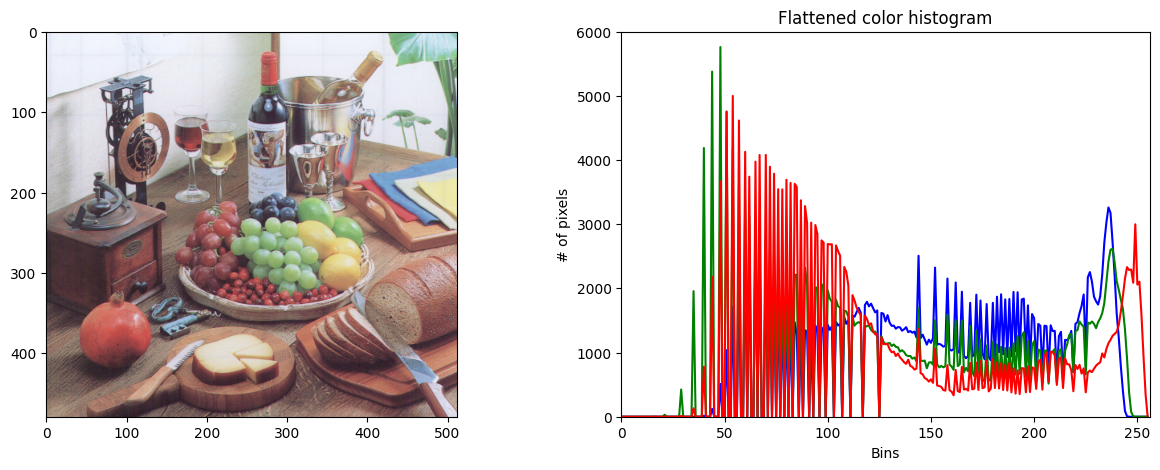

In [28]:
chans = cv.split(img_fruit)
colors = 'b', 'g', 'r'

f, axarr = plt.subplots(1,2,figsize=(15,5))

axarr[0].imshow(img_fruit)

axarr[1].set_title('Flattened color histogram')
axarr[1].set_xlabel('Bins')
axarr[1].set_ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 255])
    axarr[1].plot(hist, color=color)
    axarr[1].axis(xmin=0,xmax=256, ymin=0,ymax=6000)


In a typical histogram, there are peaks or spikes at pixel values corresponding to the most common colors in the image. However, *the following image is too dark* and so in the histogram *most of the pixel values have zero frequency*, which is not normal for a typical image.

To solve this issue and obtain a meaningful histogram *normalisation can be performed to get a more representative distribution*.

(0.0, 256.0, 0.0, 5500.0)

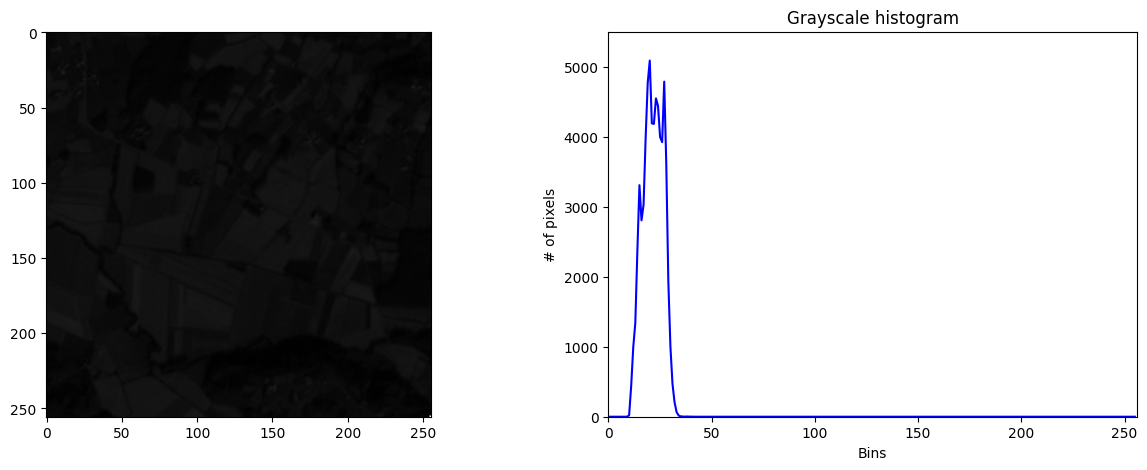

In [41]:
img_aquitain = tiff.imread(img_name_aquitain)
f, axarr = plt.subplots(1,2,figsize=(15,5))

chans = cv.split(img_aquitain)

axarr[0].imshow(img_aquitain, cmap="gray")

axarr[1].set_title('Grayscale histogram')
axarr[1].set_xlabel('Bins')
axarr[1].set_ylabel('# of pixels')

hist = cv.calcHist([img_aquitain], [0], None, [256], [0, 255])
axarr[1].plot(hist, color)
axarr[1].axis(xmin=0,xmax=256, ymin=0,ymax=5500)


Before normalization: 
 - pixel intensities are not well-distributed across the full range of 0 to 255
 - there is concentration of pixel values in certain intensity ranges
 - a lack of contrast in the original image
 
After normalization:
 - more uniform distribution of pixel values across the entire intensity range (0 to 255)
 - the contrast of the image has been enhanced
 - the full range of intensities is being utilized

(0.0, 256.0, 0.0, 5500.0)

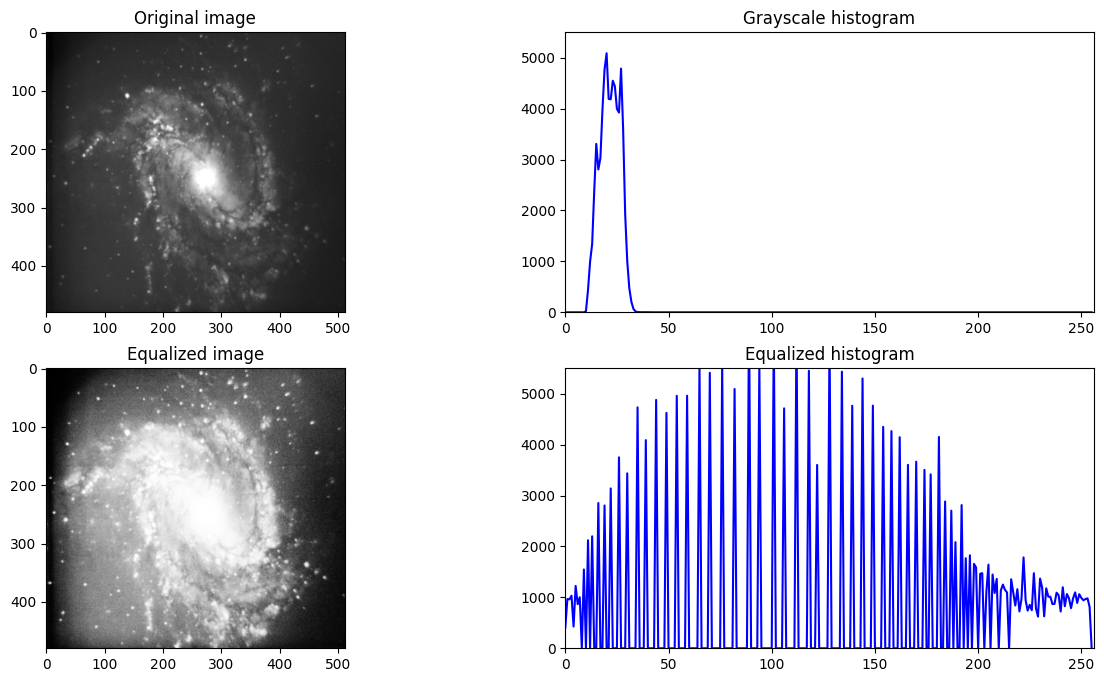

In [51]:
img_galaxy = tiff.imread(img_name_galaxy)
equ  = cv.equalizeHist(img_galaxy)

f, axarr = plt.subplots(2,2,figsize=(15,8))
axarr[0][0].imshow(img_galaxy, cmap="gray")
axarr[0][0].set_title("Original image")

axarr[0][1].set_title('Grayscale histogram')

hist = cv.calcHist([img_aquitain], [0], None, [256], [0, 255])
axarr[0][1].plot(hist, color)
axarr[0][1].axis(xmin=0,xmax=256, ymin=0,ymax=5500)

axarr[1][0].imshow(equ, cmap="gray")
axarr[1][0].set_title("Equalized image")

axarr[1][1].set_title('Equalized histogram')

hist = cv.calcHist([equ], [0], None, [256], [0, 255])
axarr[1][1].plot(hist, color)
axarr[1][1].axis(xmin=0,xmax=256, ymin=0,ymax=5500)

## 2.2 Extraction des contours

Contours in computer vision and image processing are of great interest for many reasons: Object Detection, Shape Analysis, Feature Extractio, Boundary Detection, Object Tracking, Pattern Matching.

The point of enhancing and smoothing a contour, often achieved through linear filtering or convolution, is to improve the quality of the contour for various computer vision tasks. 
Smoothing reduces noise and irregularities in the contour, making it more robust for subsequent analysis or visualization. 

In the following section we plot the 100th line of each image(test.tif, test1.tif, test2.tif et test3.tif), aiming to identify the convolution kernel for transforming "test.tif" into "test1.tif" and potentially deriving the underlying operation

Text(0.5, 1.0, 'test3.tif line 100')

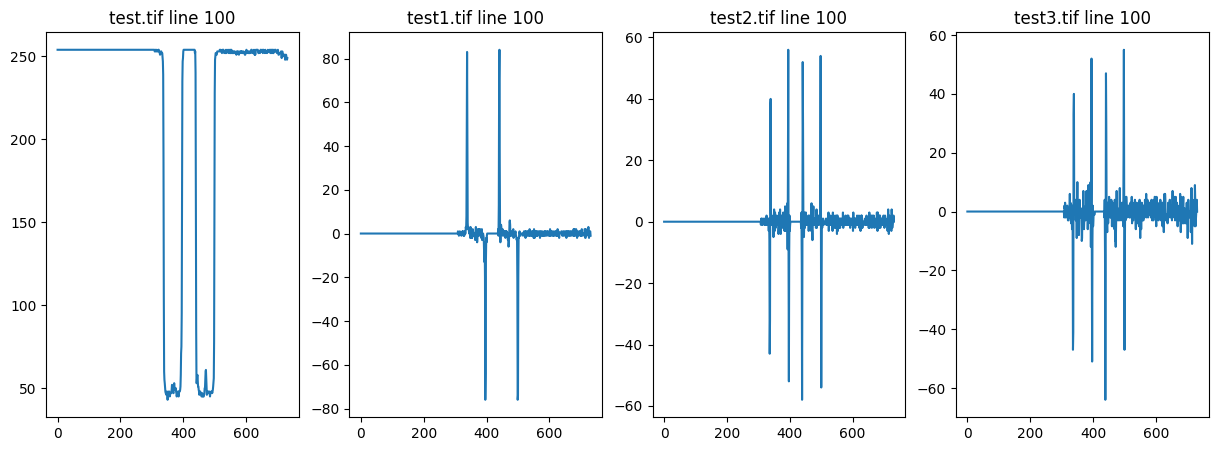

In [26]:
img_test = tiff.imread(img_name_test)
img_test1 = tiff.imread(img_name_test1)
img_test2 = tiff.imread(img_name_test2)
img_test3 = tiff.imread(img_name_test3)

f, axarr = plt.subplots(1,4,figsize=(15,5))
axarr[0].plot(img_test[99,10:-10])
axarr[0].set_title("test.tif line 100")
axarr[1].plot(img_test1[99,10:-10])
axarr[1].set_title("test1.tif line 100")
axarr[2].plot(img_test2[99,10:-10])
axarr[2].set_title("test2.tif line 100")
axarr[3].plot(img_test3[99,10:-10])
axarr[3].set_title("test3.tif line 100")

Convolving image test.tif with specific kernels allows to achive test1.tif, test2.tif, test3.tif

Text(0.5, 1.0, 'test.tif line 100:\n kernel \n[[0, 1, 0],\n[1, -4, 1],\n[0, 1, 0]]\n applied')

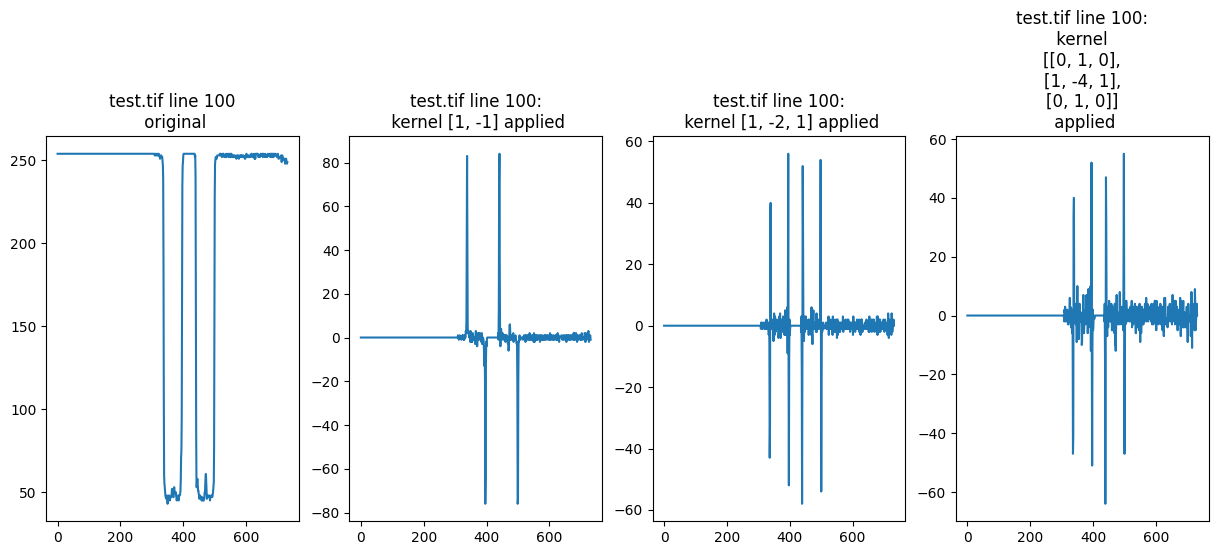

In [27]:
kernel_1 = np.matrix([[1, -1]])
kernel_2 = np.matrix([[1, -2, 1]])
kernel_3 = np.matrix([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

img1 = cv.filter2D(src=img_test, ddepth=cv.CV_16S, kernel=kernel_1)
img2 = cv.filter2D(src=img_test, ddepth=cv.CV_16S, kernel=kernel_2)
img3 = cv.filter2D(src=img_test, ddepth=cv.CV_16S, kernel=kernel_3)

f, axarr = plt.subplots(1,4,figsize=(15,5))
axarr[0].plot(img_test[99,10:-10])
axarr[0].set_title("test.tif line 100\n original")
axarr[1].plot(img1[99,10:-10])
axarr[1].set_title("test.tif line 100:\n kernel [1, -1] applied")
axarr[2].plot(img2[99,10:-10])
axarr[2].set_title("test.tif line 100:\n kernel [1, -2, 1] applied")
axarr[3].plot(img3[99,10:-10])
axarr[3].set_title("test.tif line 100:\n kernel \n[[0, 1, 0],\n[1, -4, 1],\n[0, 1, 0]]\n applied")

Edge detection:
- Computing the Sobel gradients (gX and gY) for a given image (img_test) in both the x and y directions
- Combining the gradient representations into a single image with equal contributions from both gX and gY

Text(0.5, 1.0, 'Sobel/Scharr Combined')

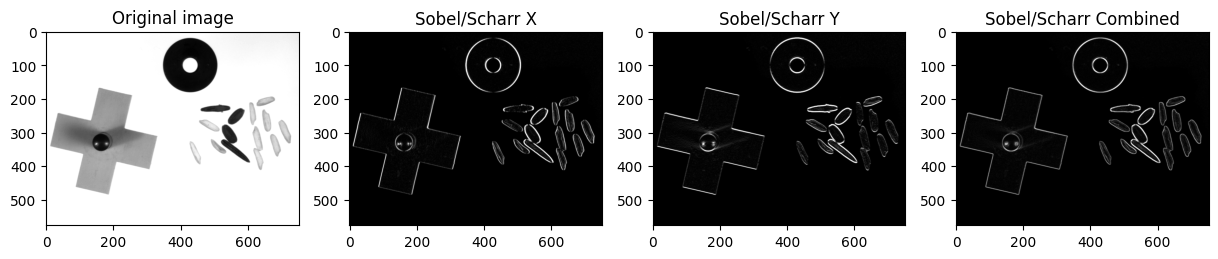

In [31]:
ksize = 3
gX = cv.Sobel(img_test, ddepth=cv.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv.Sobel(img_test, ddepth=cv.CV_32F, dx=0, dy=1, ksize=ksize)
# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv.convertScaleAbs(gX)
gY = cv.convertScaleAbs(gY)
# combine the gradient representations into a single image
combined = cv.addWeighted(gX, 0.5, gY, 0.5, 0)
# show our output images

f, axarr = plt.subplots(1,4,figsize=(15,7))
axarr[0].imshow(img_test, cmap = 'gray')
axarr[0].set_title("Original image")
axarr[1].imshow(gX, cmap = 'gray')
axarr[1].set_title("Sobel/Scharr X")
axarr[2].imshow(gY, cmap = 'gray')
axarr[2].set_title("Sobel/Scharr Y")
axarr[3].imshow(combined, cmap = 'gray')
axarr[3].set_title("Sobel/Scharr Combined")

The contours in the "Sobel/Scharr Combined" image are better defined and more pronounced compared to those in the original image, as the Sobel operator enhances edge features, making them more visible for contour extraction.

Visual comparison of contour extraction results from both the original image and the combined gradient image: 

Text(0.5, 1.0, 'Extracted contours')

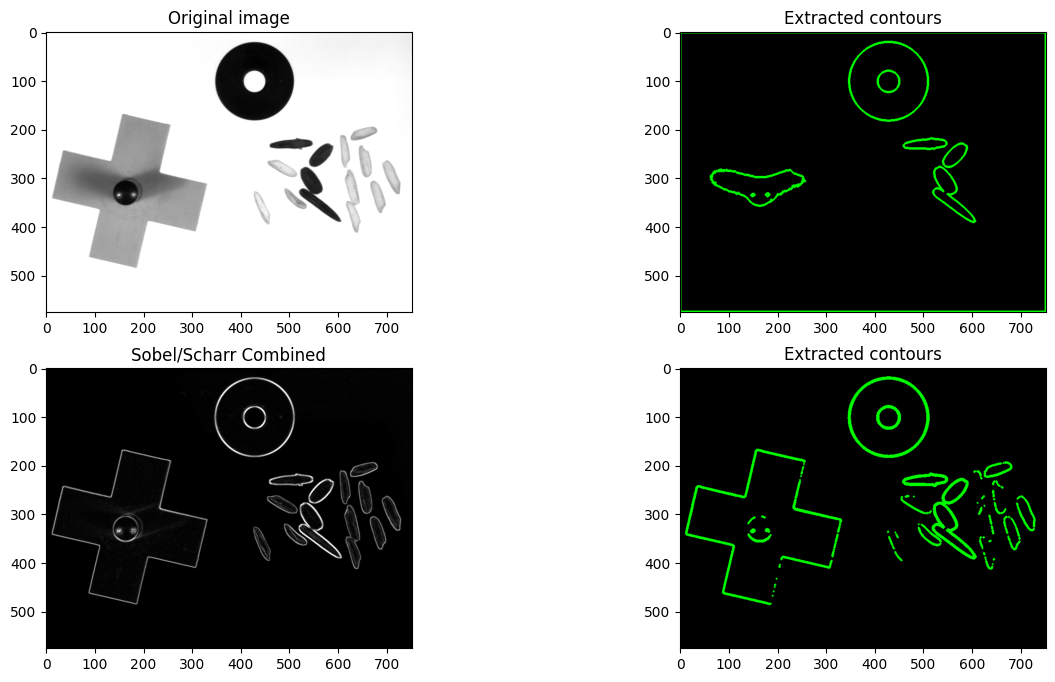

In [30]:
ret, thresh = cv.threshold(img_test, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

height, width = img_test.shape
empty_image_1 = np.zeros((height, width, 3), dtype=np.uint8)
cv.drawContours(empty_image_1, contours, -1, (0,255,0), 3)

ret, thresh = cv.threshold(combined, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

height, width = img_test.shape
empty_image_2 = np.zeros((height, width, 3), dtype=np.uint8)
cv.drawContours(empty_image_2, contours, -1, (0,255,0), 3)

f, axarr = plt.subplots(2,2,figsize=(15,8))

axarr[0][0].imshow(img_test, cmap = 'gray')
axarr[0][0].set_title("Original image")

axarr[0][1].imshow(empty_image_1)
axarr[0][1].set_title("Extracted contours")

axarr[1][0].imshow(combined, cmap = 'gray')
axarr[1][0].set_title("Sobel/Scharr Combined")

axarr[1][1].imshow(empty_image_2)
axarr[1][1].set_title("Extracted contours")

## 2.3 Réduction du bruit

 ### Averaging
A 3x3 averaging kernel is applied to a picture, to create a visually smoother version of the original image by reducing noise and fine details.
 
 - OpenCV also provides the cv2.blur() function for averaging applications

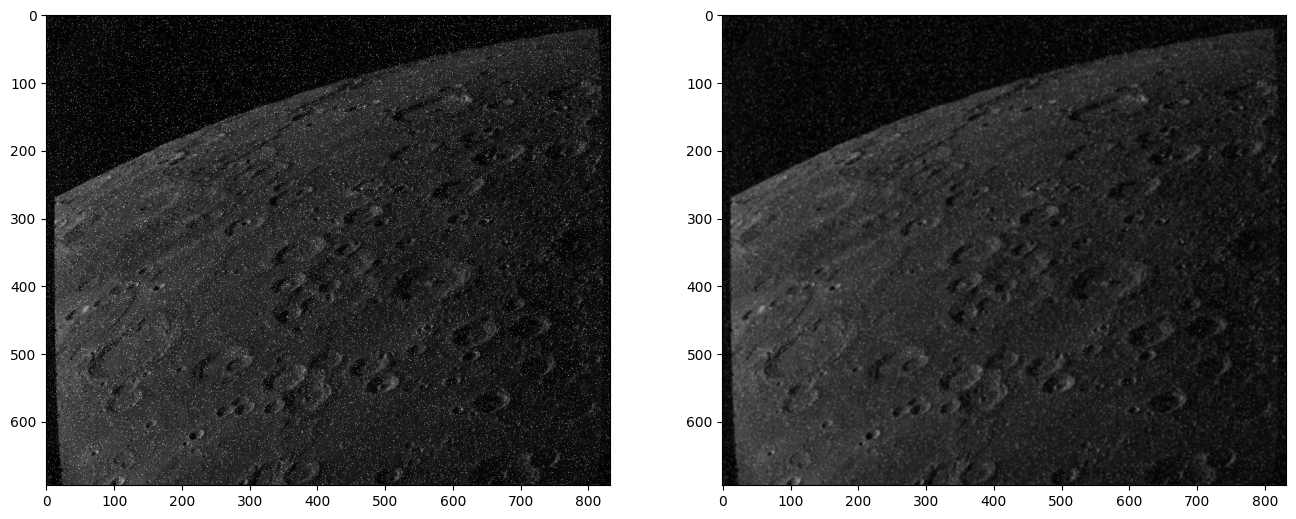

In [46]:
img_mercury = tiff.imread(img_name_mercury)

kernel1 = np.ones((3,3),np.float32)/9
img_average = cv.filter2D(src=img_mercury, ddepth=cv.CV_16S, kernel=kernel1)

#img_average = cv.blur(imc_mercury, (3,3))

f, axarr = plt.subplots(1,2,figsize=(16,9))
axarr[0].imshow(img_mercury, cmap = 'gray')
axarr[0].set_title("Original image")
axarr[1].imshow(img_average, cmap = 'gray')

## Median Blur

Median blur operation on the image with a kernel size of 5x5, results in a smoother image that effectively reduces noise and preserves edges and fine details in the original image.

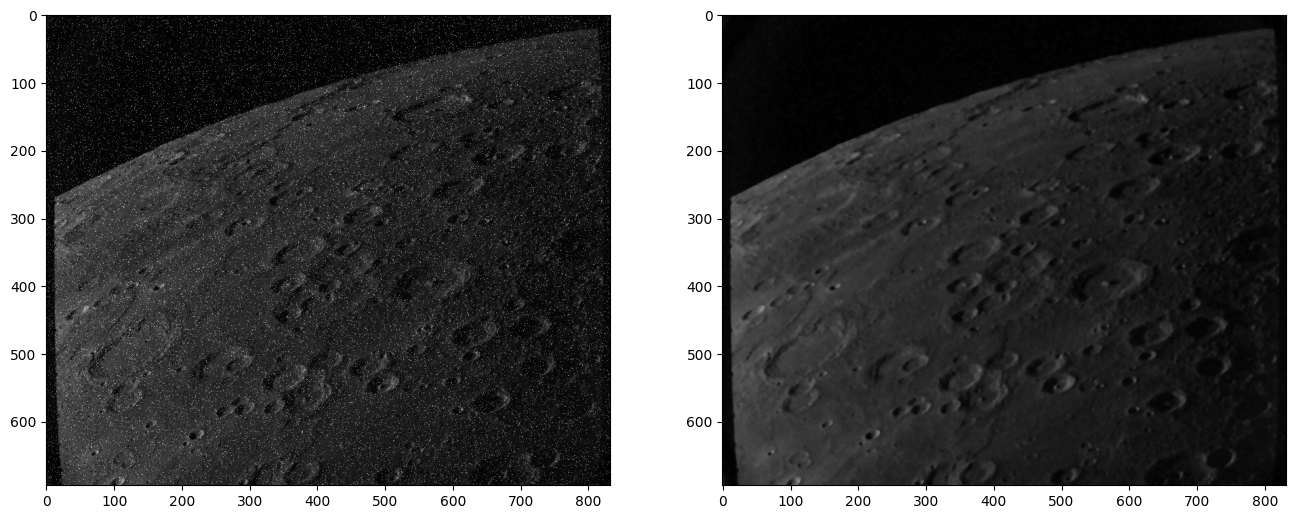

In [43]:
img_median = cv.medianBlur(img_mercury, 5)

f, axarr = plt.subplots(1,2,figsize=(16,9))
axarr[0].imshow(img_mercury, cmap = 'gray')
axarr[0].set_title("Original image")
axarr[1].imshow(img_median, cmap = 'gray')

## Fourier transform

The "fourier_transform" method performs the following operations on an input image:

- compute the Discrete Fourier Transform (DFT) of the image, shifting the frequency components to center them.
- calculate the magnitude spectrum, which represents the logarithm of the magnitude of the shifted DFT, providing insights into the image's frequency content.
- apply a circular mask in the frequency domain, centered at the middle frequency components and with a radius of 30 pixels, to suppress high-frequency information. 
- perform inverse DFT to obtain a denoised image in the spatial domain
- returns both the magnitude spectrum and the denoised image, making it useful for analyzing and processing images with Fourier transform techniques


Text(0.5, 1.0, 'Result in JET')

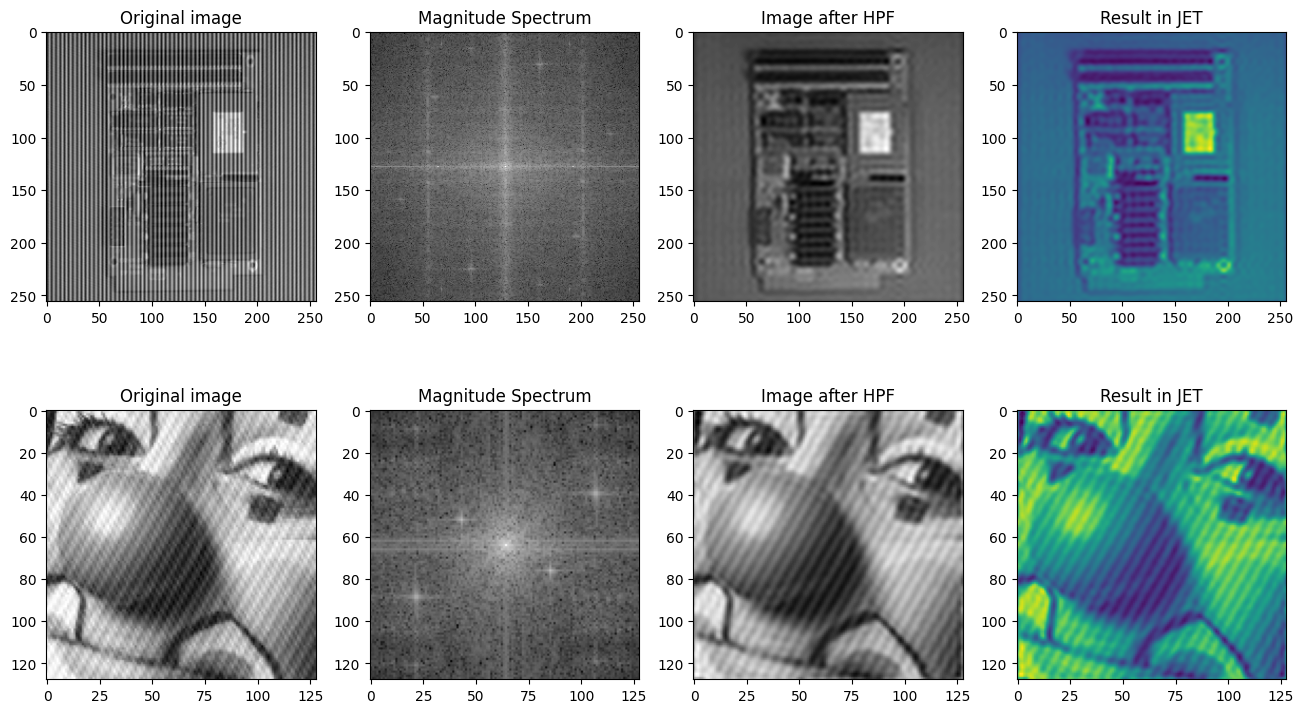

In [42]:
def fourier_transform(img):
    dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    
    rows, cols = img.shape
    crow,ccol = rows//2 , cols//2
    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((rows,cols,2),np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1
    # apply mask and inverse DFT
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
    
    return magnitude_spectrum, img_back


img_noise = tiff.imread(img_name_noise)
img_clown = tiff.imread(img_name_clown)

magnitude_spectrum, img_back = fourier_transform(img_noise)
magnitude_spectrum2, img_back2 = fourier_transform(img_clown)

f, axarr = plt.subplots(2,4,figsize=(16,9))

axarr[0][0].imshow(img_noise, cmap = 'gray')
axarr[0][0].set_title("Original image")
axarr[0][1].imshow(magnitude_spectrum, cmap = 'gray')
axarr[0][1].set_title("Magnitude Spectrum")
axarr[0][2].imshow(img_back, cmap = 'gray')
axarr[0][2].set_title("Image after HPF")
axarr[0][3].imshow(img_back)
axarr[0][3].set_title("Result in JET")

axarr[1][0].imshow(img_clown, cmap = 'gray')
axarr[1][0].set_title("Original image")
axarr[1][1].imshow(magnitude_spectrum2, cmap = 'gray')
axarr[1][1].set_title("Magnitude Spectrum")
axarr[1][2].imshow(img_back2, cmap = 'gray')
axarr[1][2].set_title("Image after HPF")
axarr[1][3].imshow(img_back2)
axarr[1][3].set_title("Result in JET")

In conclusion, the Python code segments presented in this report demonstrate valuable techniques for image manipulation and analysis. The code not only showcases the application of filtering methods like averaging and median blur to reduce noise and enhance image quality but also illustrates contour extraction, which can be instrumental in identifying object boundaries within images. Furthermore, the Fourier transform-based denoising method highlights the importance of frequency analysis in image processing, offering a means to reveal underlying structures while reducing unwanted noise. Overall, these code segments serve as practical tools for various image processing tasks and provide a foundation for further exploration and development in the field.